In [6]:
import os
from sys import exit, exc_info, argv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install git+https://github.com/slremy/netsapi --user --upgrade

from netsapi.challenge import *
# For a given environment, evaluate a policy by applying its evaluateReward method
    

  Cloning https://github.com/slremy/netsapi to /private/var/folders/nh/8jkcnd190cd60q13l2ds0gh40000gn/T/pip-req-build-00o7n2c_
  Running command git clone -q https://github.com/slremy/netsapi /private/var/folders/nh/8jkcnd190cd60q13l2ds0gh40000gn/T/pip-req-build-00o7n2c_
  Stored in directory: /private/var/folders/nh/8jkcnd190cd60q13l2ds0gh40000gn/T/pip-ephem-wheel-cache-lnk7qhz9/wheels/9e/73/c9/86a9cc2460e11b3ce5b0a5ebd2d9d332a68afe0941659967fa
Successfully built netsapi
  Found existing installation: netsapi 1.1
    Uninstalling netsapi-1.1:
      Successfully uninstalled netsapi-1.1


In [ ]:
envSeqDec.evaluatePolicy(policy)

# Sarsa

In [7]:
class RL(object):
    def __init__(self, action_space, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        self.actions = action_space  # a list
        self.lr = learning_rate
        self.gamma = reward_decay
        self.epsilon = e_greedy

        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float64)

    def check_state_exist(self, state):
        if state not in self.q_table.index:
            # append new state to q table
            self.q_table = self.q_table.append(
                pd.Series(
                    [0]*len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )

    def choose_action(self, observation):
        self.check_state_exist(observation)
        # action selection
        if np.random.rand() < self.epsilon:
            # choose best action
            state_action = self.q_table.loc[observation, :]
            # some actions may have the same value, randomly choose on in these actions
            action = np.random.choice(state_action[state_action == np.max(state_action)].index)
        else:
            # choose random action
            action = np.random.choice(self.actions)
        return action

    def learn(self, *args):
        pass


# off-policy
class QLearningTable():
    
    def __init__(self, actions, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        super(QLearningTable, self).__init__(actions, learning_rate, reward_decay, e_greedy)

    def learn(self, s, a, r, s_):
        self.check_state_exist(s_)
        q_predict = self.q_table.loc[s, a]
        if s_ != 'terminal':
            q_target = r + self.gamma * self.q_table.loc[s_, :].max()  # next state is not terminal
        else:
            q_target = r  # next state is terminal
        self.q_table.loc[s, a] += self.lr * (q_target - q_predict)  # update


# on-policy
class SarsaTable(RL):

    def __init__(self, actions, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        super(SarsaTable, self).__init__(actions, learning_rate, reward_decay, e_greedy)

    def learn(self, s, a, r, s_, a_):
        self.check_state_exist(s_)
        q_predict = self.q_table.loc[s, a]
        if s_ != 'terminal':
            q_target = r + self.gamma * self.q_table.loc[s_, a_]  # next state is not terminal
        else:
            q_target = r  # next state is terminal
        self.q_table.loc[s, a] += self.lr * (q_target - q_predict)  # update
    


# Single point

In [32]:
def generate():
    
    #action_space = [[0.0, 1.0], [1.0, 0.0], [0.2, 0], [0, 0.2], [0.2, 0.2]]
    action_space = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
    rewards_20 = []
    policy_20 = []
    rewards_seq = []
    envSeqDec = ChallengeSeqDecEnvironment(experimentCount=20000)

    
    for episode in range(20):
        
        # initial observation
        envSeqDec.reset()
        observation =1
        rewards=0
        policy={}
        
        for j in range(5):
            # fresh env
            # env.render()
            # RL choose action based on observation
            # print(observation)
            # print(str(observation))
            action = RL.choose_action(str(observation))
            a=action_space[action-1]
            #print(';;;;;;;;;;;',j,']]]]',a)
            policy[str(j+1)]=a
            # RL take action and get next observation and reward
            observation_, reward, done, info = envSeqDec.evaluateAction(a)
            if reward:
                rewards+=reward
            if not reward:
                pass
            #print(observation_, reward, done, info)
            action_ = RL.choose_action(str(observation_))
            
            # RL learn from this transition
            RL.learn(str(observation), action, reward, str(observation_), action_)
            
            # swap observation
            observation = observation_
            
            # break while loop when end of this episode
            if done:
                #print('Episode:', episode + 1, ' Reward: %i' % int(rewards))
               # print('Policy:', policy)
                break
                
        #print('sequential result')
        #seq_reward = envSeqDec.evaluatePolicy(policy)
        #rewards_seq.append(seq_reward)
        #print(seq_reward)
        rewards_20.append(rewards)
        policy_20.append(policy)
    if(max(rewards_20)) > 450:
        print(f'*******************************got it _{policy[rewards_20.index(max(rewards_20))]}_{max(rewards_20)}')
    print(max(rewards_20))
    
    #print('Best Reward:',np.max(rewards_20))
   # print('Best Policy:',policy_20[np.argmax(rewards_20)])
#     x = list(range(len(rewards_20)))
#     plt.plot(x, rewards_20)
#     #plt.title(f'Sarsa Result action_space: {action_space} learn_rate: {learning_rate} reward_decay: {reward_decay} e_greedy: {e_greedy}')
#     plt.title('Sarsa Result')
#     plt.xlabel('Episodes')
#     plt.ylabel('Rewards')
#     plt.show()


In [33]:
envSeqDec = ChallengeSeqDecEnvironment(experimentCount=20000)
action_space = [1,2,3,4]
RL = SarsaTable(actions=action_space,
                learning_rate=0.01,
                reward_decay=0.5,
                e_greedy=0.9)
generate()

20000  Evaluations Remaining
19999  Evaluations Remaining
19998  Evaluations Remaining
19997  Evaluations Remaining
19996  Evaluations Remaining
19995  Evaluations Remaining
19994  Evaluations Remaining
19993  Evaluations Remaining
19992  Evaluations Remaining
19991  Evaluations Remaining
19990  Evaluations Remaining
19989  Evaluations Remaining
19988  Evaluations Remaining
19987  Evaluations Remaining
19986  Evaluations Remaining
19985  Evaluations Remaining
19984  Evaluations Remaining
19983  Evaluations Remaining
19982  Evaluations Remaining
19981  Evaluations Remaining
19980  Evaluations Remaining
19979  Evaluations Remaining
19978  Evaluations Remaining
19977  Evaluations Remaining
19976  Evaluations Remaining
19975  Evaluations Remaining
19974  Evaluations Remaining
19973  Evaluations Remaining
19972  Evaluations Remaining
19971  Evaluations Remaining
19970  Evaluations Remaining
19969  Evaluations Remaining
19968  Evaluations Remaining
19967  Evaluations Remaining
19966  Evaluat

# Find best seed

In [30]:
def run_this(ii):
    random.seed(ii)
    print('sssssssssssssssssssssssssssssssssssssseed', ii)
    action_space = [1,2,3,4]
    RL = SarsaTable(actions=action_space,
                    learning_rate=0.03,
                    reward_decay=0.3,
                    e_greedy=0.9)
    generate()

In [31]:
import time
def main():
    
    index = list(range(200, 0,-1))
    pool = Pool()
    func = run_this
    pool.map(func, index)
    pool.close()
    pool.join()

    
print(f'搜索开始时间：{time.strftime("%Y-%m-%d %H:%M:%S")}')
anss = {}
main()
print(f'搜索结束时间：{time.strftime("%Y-%m-%d %H:%M:%S")}')


搜索开始时间：2019-06-27 09:49:23
sssssssssssssssssssssssssssssssssssssseed 190
sssssssssssssssssssssssssssssssssssssseed 195
sssssssssssssssssssssssssssssssssssssseed 180
sssssssssssssssssssssssssssssssssssssseed 200
sssssssssssssssssssssssssssssssssssssseed 185
sssssssssssssssssssssssssssssssssssssseed 165
sssssssssssssssssssssssssssssssssssssseed 160
sssssssssssssssssssssssssssssssssssssseed 175
sssssssssssssssssssssssssssssssssssssseed 155
sssssssssssssssssssssssssssssssssssssseed 150
sssssssssssssssssssssssssssssssssssssseed 170
sssssssssssssssssssssssssssssssssssssseed 145
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
19998  Evaluations Remaining
sssssssssssssssssssssssssssssssssssssseed 140
sssssssssssssssssssssssssss

Process ForkPoolWorker-230:
Process ForkPoolWorker-240:
Process ForkPoolWorker-239:
Process ForkPoolWorker-236:
Process ForkPoolWorker-233:
Process ForkPoolWorker-241:
Process ForkPoolWorker-232:
Process ForkPoolWorker-238:
Process ForkPoolWorker-231:
Process ForkPoolWorker-237:
Process ForkPoolWorker-235:
Process ForkPoolWorker-234:
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 

# A good result with 2 actions

In [ ]:
envSeqDec = ChallengeSeqDecEnvironment(experimentCount=20000)
action_space = [1,2]
RL = SarsaTable(actions=action_space,
                learning_rate=0.05,
                reward_decay=0.5,
                e_greedy=0.9)
generate()

# Sarsa Lambda

In [34]:
class RL(object):
    def __init__(self, action_space, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        self.actions = action_space  # a list
        self.lr = learning_rate
        self.gamma = reward_decay
        self.epsilon = e_greedy

        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float64)

    def check_state_exist(self, state):
        if state not in self.q_table.index:
            # append new state to q table
            self.q_table = self.q_table.append(
                pd.Series(
                    [0]*len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )

    def choose_action(self, observation):
        self.check_state_exist(observation)
        # action selection
        if np.random.rand() < self.epsilon:
            # choose best action
            state_action = self.q_table.loc[observation, :]
            # some actions may have the same value, randomly choose on in these actions
            action = np.random.choice(state_action[state_action == np.max(state_action)].index)
        else:
            # choose random action
            action = np.random.choice(self.actions)
        return action

    def learn(self, *args):
        pass


# backward eligibility traces
class SarsaLambdaTable(RL):
    def __init__(self, actions, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9, trace_decay=0.9):
        super(SarsaLambdaTable, self).__init__(actions, learning_rate, reward_decay, e_greedy)

        # backward view, eligibility trace.
        self.lambda_ = trace_decay
        self.eligibility_trace = self.q_table.copy()

    def check_state_exist(self, state):
        if state not in self.q_table.index:
            # append new state to q table
            to_be_append = pd.Series(
                    [0] * len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            self.q_table = self.q_table.append(to_be_append)

            # also update eligibility trace
            self.eligibility_trace = self.eligibility_trace.append(to_be_append)

    def learn(self, s, a, r, s_, a_):
        self.check_state_exist(s_)
        q_predict = self.q_table.loc[s, a]
        if s_ != 'terminal':
            q_target = r + self.gamma * self.q_table.loc[s_, a_]  # next state is not terminal
        else:
            q_target = r  # next state is terminal
        error = q_target - q_predict

        # increase trace amount for visited state-action pair

        # Method 1:
        # self.eligibility_trace.loc[s, a] += 1

        # Method 2:
        self.eligibility_trace.loc[s, :] *= 0
        self.eligibility_trace.loc[s, a] = 1

        # Q update
        self.q_table += self.lr * error * self.eligibility_trace

        # decay eligibility trace after update
        self.eligibility_trace *= self.gamma*self.lambda_

In [91]:
def generate():
    step_size = 0.2
    action_space = []
    for step1 in range(0, int(1 / step_size) + 1):
        for step2 in range(0, int(1 / step_size) + 1):
            action_space.append([step1 * step_size, step2 * step_size])    
    print(len(action_space))
    #action_space = [[0.0, 0.8], [1.0, 0.0], [0.0, 0.2], [1.0, 1.0]]
    rewards_20 = []
    policy_20 = []
    rewards_seq = []
    policy={'1': [0,0.8], '2': [1, 0]}
    for episode in range(20):
        
        # initial observation
        envSeqDec.reset()
        observation =1
        rewards=0
        
        for j in range(20):

            action = RL.choose_action(str(observation))
            a=action_space[action-1]
            if j == 0:
                a = [0,0.8]
            if j == 1:
                a = [1,0]
            print(';;;;;;;;;;;',j,']]]]',a)
            policy[str(j+1)]=a    
            # RL take action and get next observation and reward
            observation_, reward, done, info = envSeqDec.evaluateAction(a)
            if reward:
                rewards+=reward
            if not reward:
                pass
            print(observation_, reward, done, info)
            action_ = RL.choose_action(str(observation_))
            
            # RL learn from this transition
            RL.learn(str(observation), action, reward, str(observation_), action_)
            
            # swap observation
            observation = observation_
            
            # break while loop when end of this episode
            if done:
                print('Episode:', episode + 1, ' Reward: %i' % int(rewards))
                print('Policy:', policy)
                break
                
        rewards_20.append(rewards)
        policy_20.append(policy)
        
    print('Best Reward:',np.max(rewards_20))
    print('Best Policy:',policy_20[np.argmax(rewards_20)])
    x = list(range(len(rewards_20)))
    plt.plot(x, rewards_20)
    #plt.title(f'Sarsa Result action_space: {action_space} learn_rate: {learning_rate} reward_decay: {reward_decay} e_greedy: {e_greedy}')
    plt.title('Sarsa Lamda Result')
    plt.xlabel('Episodes')
    plt.ylabel('Rewards')
    plt.show()

36
;;;;;;;;;;; 0 ]]]] [0, 0.8]
20000  Evaluations Remaining
2 108.12092113311733 False {}
;;;;;;;;;;; 1 ]]]] [1, 0]
19999  Evaluations Remaining
3 91.86760910188947 False {}
;;;;;;;;;;; 2 ]]]] [1.0, 0.6000000000000001]
19998  Evaluations Remaining
4 31.771132733924855 False {}
;;;;;;;;;;; 3 ]]]] [0.8, 0.8]
19997  Evaluations Remaining
5 9.617632117156152 False {}
;;;;;;;;;;; 4 ]]]] [0.0, 0.4]
19996  Evaluations Remaining
6 17.014590840130445 True {}
Episode: 1  Reward: 258
Policy: {'1': [0, 0.8], '2': [1, 0], '3': [1.0, 0.6000000000000001], '4': [0.8, 0.8], '5': [0.0, 0.4]}
;;;;;;;;;;; 0 ]]]] [0, 0.8]
19995  Evaluations Remaining
2 117.1484476651121 False {}
;;;;;;;;;;; 1 ]]]] [1, 0]
19994  Evaluations Remaining
3 99.06038096649213 False {}
;;;;;;;;;;; 2 ]]]] [0.0, 1.0]
19993  Evaluations Remaining
4 97.23487894895021 False {}
;;;;;;;;;;; 3 ]]]] [0.6000000000000001, 0.0]
19992  Evaluations Remaining
5 32.47220405364665 False {}
;;;;;;;;;;; 4 ]]]] [0.0, 0.4]
19991  Evaluations Remaining

2 115.13628131148172 False {}
;;;;;;;;;;; 1 ]]]] [1, 0]
19929  Evaluations Remaining
3 91.24201599617506 False {}
;;;;;;;;;;; 2 ]]]] [0.6000000000000001, 0.6000000000000001]
19928  Evaluations Remaining
4 33.94883259730819 False {}
;;;;;;;;;;; 3 ]]]] [0.2, 1.0]
19927  Evaluations Remaining
5 10.002887182656133 False {}
;;;;;;;;;;; 4 ]]]] [0.0, 0.4]
19926  Evaluations Remaining
6 -0.2555711590993841 True {}
Episode: 15  Reward: 250
Policy: {'1': [0, 0.8], '2': [1, 0], '3': [0.6000000000000001, 0.6000000000000001], '4': [0.2, 1.0], '5': [0.0, 0.4]}
;;;;;;;;;;; 0 ]]]] [0, 0.8]
19925  Evaluations Remaining
2 115.86651478409655 False {}
;;;;;;;;;;; 1 ]]]] [1, 0]
19924  Evaluations Remaining
3 97.83948983507395 False {}
;;;;;;;;;;; 2 ]]]] [0.0, 1.0]
19923  Evaluations Remaining
4 98.18701148898859 False {}
;;;;;;;;;;; 3 ]]]] [0.6000000000000001, 0.0]
19922  Evaluations Remaining
5 37.91728570441094 False {}
;;;;;;;;;;; 4 ]]]] [0.8, 0.0]
19921  Evaluations Remaining
6 4.422031166506626 True {

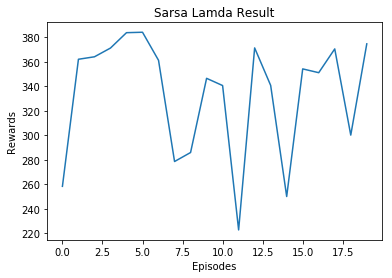

In [92]:
#action_space = [[0.0, 1.0], [1.0, 0.0], [0.0, 0.0], [1.0, 1.0]]

        
envSeqDec = ChallengeSeqDecEnvironment(experimentCount=20000)
action_space = list(range(1, 37)) # Using two actions can get steady 490 - 500 result.
RL = SarsaLambdaTable(actions=action_space,
            learning_rate=0.3,
            reward_decay=0.5,
            e_greedy=0.8)
generate()